# Predicting the popularity of TED Talk
### Build a classification model based on all uploaded TED Talks from official TED.com website until September 21st, 2017.

## Business Understanding
TED Talk is my favorite program because of its diverse contents that cross different fields and creative ideas. One day, when I visit the website of TED Talk, there was a question pop-up automatically asking me “what interests you”? (Technology, Science, Innovation, and Humanity, etc.) Right after, another question came up asking me “what you’re looking for”? (Professional Growth, Inspiration or motivation, and Smart entertainment, etc.)
After selecting my interested topic and idea, there is one recommended talk pop-up to me along with a sentence saying, “The idea offers ‘professional growth’ and matches your interest in ‘innovation’”. Frankly, I was so surprised that I can just let the website know my interest and then the website will give me a recommended video that matches my interest. This recommend feature reminds me the concept that we can extract information with algorithms from large dataset and present it in a comprehensible way. Consequently, I strongly want to apply visualization technique to a dataset to visualize important information, as well as train a classification model that could learn from the dataset and predict an output based on input.

The purpose of this project is to apply data mining techniques on the TED Talk dataset to get a better understanding of what makes a popular TED Talk, what are the most popular topics people would like to discuss about. And building a prediction model that could predict the popularity of a TED talk when transcripts is given.

The [dataset](https://www.kaggle.com/rounakbanik/ted-talks/home) I am using for this project is downloaded from Kaggle, which has approximately 2500 TED Talks available. There are two CSV Files available, one includes the main attributes of a TED Talk and the other one includes the URL and its transcripts of a given Talk. Following objetives would be demonstrated using the Cross Industry Process for Data Mining (CRISP-DM) process:

**1. What makes a TED Talk popular?**

**2. What are the most popular topics?**

**3. Predict the popularity of a TED Talk based on its transcript.**

## Data Understanding

In [1]:
# Import all necessary libraries here
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import ast
from subprocess import call
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style(style='ticks')

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load dataset from CSV files
tedMain = pd.read_csv('../Dataset/ted_main.csv')
rawTranscripts = pd.read_csv('../Dataset/transcripts.csv')

#### ted_main.csv

In [3]:
tedMain.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [4]:
tedMain.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [5]:
tedMain.shape

(2550, 17)

In [6]:
tedMain.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Feature descriptions for Dataframe - tedMain

- __comments__: The number of first level comments made on the talk <br/>
- __description__: A blurb of what the talk is about <br/>
- __duration__: The duration of the talk in seconds <br/>
- __event__: The TED/TEDx event where the talk took place <br/>
- __film_date__: The Unix timestamp of the filming <br/>
- __languages__: The number of languages in which the talk is available <br/>
- __main_speaker__: The first named speaker of the talk <br/>
- __name__: The official name of the TED Talk. Includes the title and the speaker. <br/>
- __num_speaker__: The number of speakers in the talk <br/>
- __published_date__: The Unix timestamp for the publication of the talk on TED.com <br/>
- __ratings__: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.) <br/>
- __related_talks__: A list of dictionaries of recommended talks to watch next <br/>
- __speaker_occupation__: The occupation of the main speaker <br/>
- __tags__: The themes associated with the talk <br/>
- __title__: The title of the talk <br/>
- __url__: The URL of the talk <br/>
- __views__: The number of views on the talk <br/>


#### transcripts.csv

In [7]:
rawTranscripts.dtypes

transcript    object
url           object
dtype: object

In [8]:
rawTranscripts.shape

(2467, 2)

In [9]:
rawTranscripts.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


### Feature descriptions for Dataframe - transcript

- __transcript__: The official English transcript of the talk. <br/>
- __url__: The URL of the talk <br/>

##### Is there any outlier?

Get the top 5 talks and check if those speakers are very famous persons, if yes, it would be considered as '__outlier__' because celebrity charm may contribute to additional views.(Thanks to __Junyan Huang__ for this suggestion) <br/>

__Note__: After did search from __Wikipedia__, none of those speaker are well-known celebrities, no __outlier__ identified.

In [10]:
pop_talks = tedMain[['title','main_speaker','views','film_date']].sort_values('views',ascending=False)[:5]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,1140825600
1346,Your body language may shape who you are,Amy Cuddy,43155405,1340668800
677,How great leaders inspire action,Simon Sinek,34309432,1253145600
837,The power of vulnerability,Brené Brown,31168150,1275782400
452,10 things you didn't know about orgasm,Mary Roach,22270883,1233878400


__Ken Robinson (educationalist)__ <br/>
*From Wikipedia, the free encyclopedia*<br/>
<br/>
Sir Kenneth Robinson (born 4 March 1950) is a British author, speaker and international advisor on education in the arts to government, non-profits, education and arts bodies. He was Director of the Arts in Schools Project (1985–89) and Professor of Arts Education at the University of Warwick (1989–2001), and is now Professor Emeritus at the same institution.[1] In 2003 he was knighted for services to the arts.[2] <br/>
<br/>
Originally from a working class Liverpool family, Robinson now lives in Los Angeles with his wife and children.<br/>

#### Correlation on numberic values
__Pandas__ DataFrame has a corr method that calculates Pearson’s (can be another) correlation coefficient between all couples of numeric columns of the DataFrame.

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


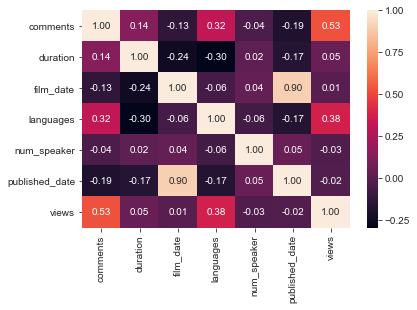

In [11]:
sns.heatmap(tedMain.corr(), annot=True, fmt=".2f")

# print the correlation in a table
tedMain.corr()

##### Is there any missing values?

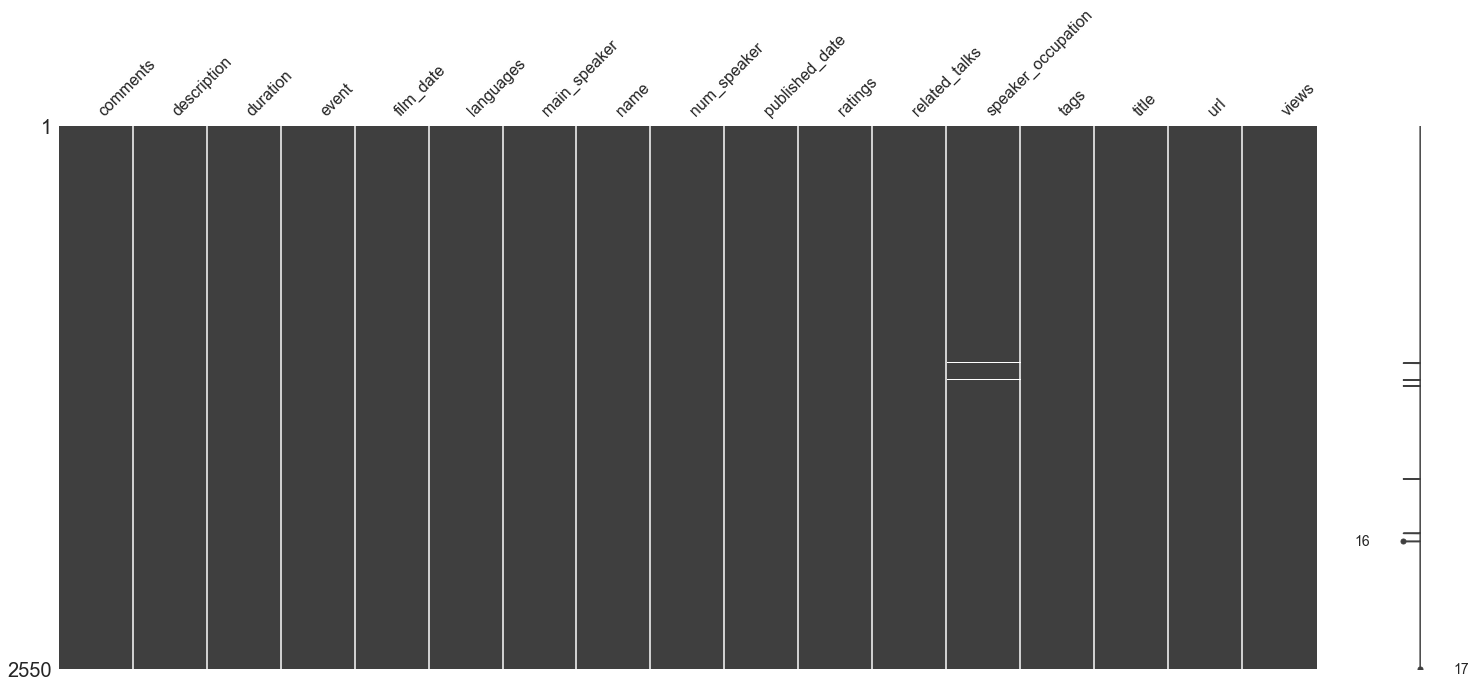

In [12]:
import missingno as msno

# visualize missing values in the datframe.
msno.matrix(tedMain)

In [13]:
tedMain.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

In [14]:
# fill the missing value with 'UNKOWN'
tedMain.speaker_occupation.fillna('UNKOWN', inplace=True)

##### Is there any columns/features can be dropped?
While analyzing the available features, it was noticed that there is one feature - __name__ -can be removed because information represented is redundant or useless for this project objective.<br/>
For example:<br/>
  __name = main_speaker: title__ <br/>



In [15]:
tedMain.loc[0:3,['name','main_speaker','title']]

,name,main_speaker,title
0,Ken Robinson: Do schools kill creativity?,Ken Robinson,Do schools kill creativity?
1,Al Gore: Averting the climate crisis,Al Gore,Averting the climate crisis
2,David Pogue: Simplicity sells,David Pogue,Simplicity sells
3,Majora Carter: Greening the ghetto,Majora Carter,Greening the ghetto


__related_talks__ is a list of dictionaries of recommended talks to watch next. Since the goal for this project is to build a Classification Model, this column would not be used for building the model.

In [16]:
tedMain.related_talks[0]

'[{\'id\': 865, \'hero\': \'https://pe.tedcdn.com/images/ted/172559_800x600.jpg\', \'speaker\': \'Ken Robinson\', \'title\': \'Bring on the learning revolution!\', \'duration\': 1008, \'slug\': \'sir_ken_robinson_bring_on_the_revolution\', \'viewed_count\': 7266103}, {\'id\': 1738, \'hero\': \'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg\', \'speaker\': \'Ken Robinson\', \'title\': "How to escape education\'s death valley", \'duration\': 1151, \'slug\': \'ken_robinson_how_to_escape_education_s_death_valley\', \'viewed_count\': 6657572}, {\'id\': 2276, \'hero\': \'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg\', \'speaker\': \'Linda Cliatt-Wayman\', \'title\': \'How to fix a broken school? Lead fearlessly, love hard\', \'duration\': 1027, \'slug\': \'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard\', \'viewed_count\': 1617101}, {\'id\': 892, \'hero\': \'https://pe.tedcdn.com/ima

__url__ is a link you can use for navigating to the Talk on their website, and it also serves as a join key between __ted_main.csv__ and __transcripts.csv__.

In [17]:
tedMain.url.head()

0    https://www.ted.com/talks/ken_robinson_says_sc...
1    https://www.ted.com/talks/al_gore_on_averting_...
2    https://www.ted.com/talks/david_pogue_says_sim...
3    https://www.ted.com/talks/majora_carter_s_tale...
4    https://www.ted.com/talks/hans_rosling_shows_t...
Name: url, dtype: object

__main_speaker__ is the speaker name of the talk , from the _describe_ function, it is very clear that this column has more than 86% unique values.

In [18]:
tedMain.main_speaker.describe()

count             2550
unique            2156
top       Hans Rosling
freq                 9
Name: main_speaker, dtype: object

#### Visualization

##### How is the dirtribution for number of views that could indicate the popularity?

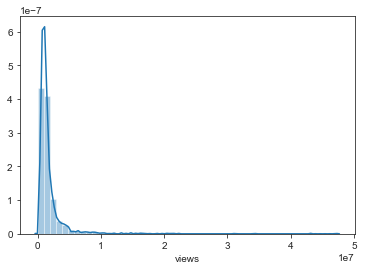

In [19]:
sns.distplot(tedMain.views)

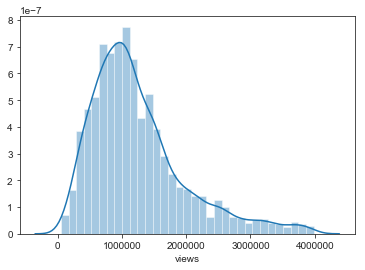

In [20]:
sns.distplot(tedMain[tedMain.views < 0.4e7]['views'])

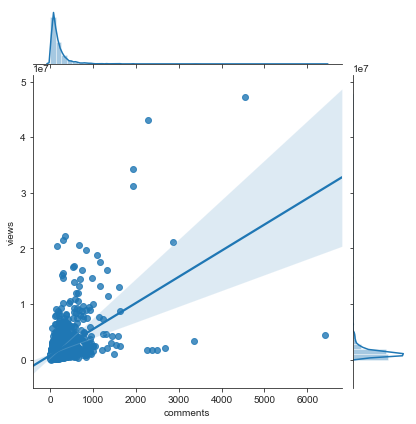

In [21]:
sns.jointplot(x=tedMain['comments'], y=tedMain['views'], kind='reg')

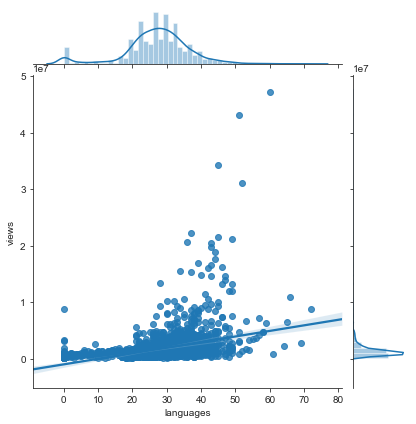

In [22]:
sns.jointplot(x=tedMain['languages'], y=tedMain['views'], kind='reg')

##### What are the Top 10 Talks?

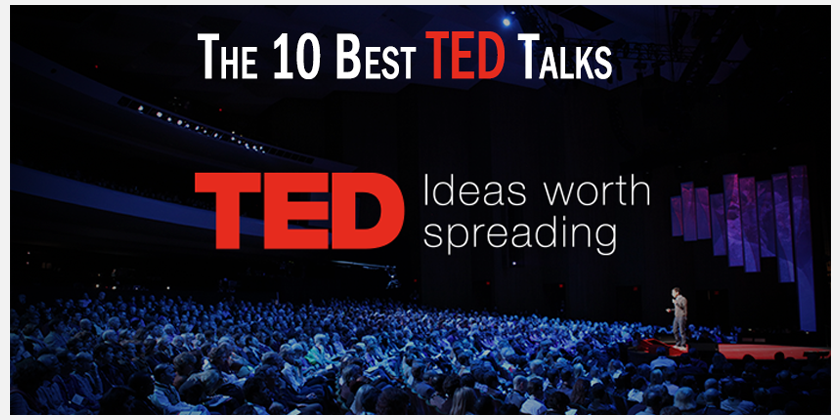

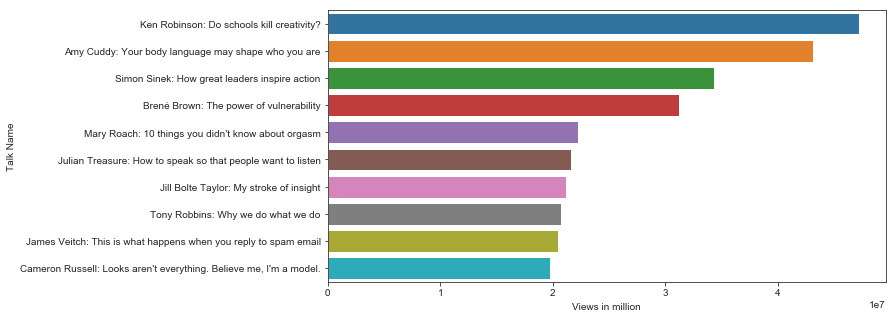

In [23]:
plt.figure(figsize=(10,5))
bar=sns.barplot(x="views", y="name", data=tedMain.sort_values('views', ascending=False)[:10])
bar.set(xlabel='Views in million', ylabel='Talk Name')
display(Image("imgs/top10_talks.png", width=600))

##### How many languages do most of the TED Talks support?

In [24]:
language_df = tedMain.languages.value_counts().reset_index()
language_df.columns=['number_of_lanaguages','number_of_talks']

language_df = language_df.sort_values('number_of_lanaguages', ascending=True)
language_df.head()

,number_of_lanaguages,number_of_talks
14,0,86
35,1,10
42,2,6
46,3,5
37,4,8


[Text(0,0.5,'Number of Talks'), Text(0.5,0,'Number of lanaguages')]

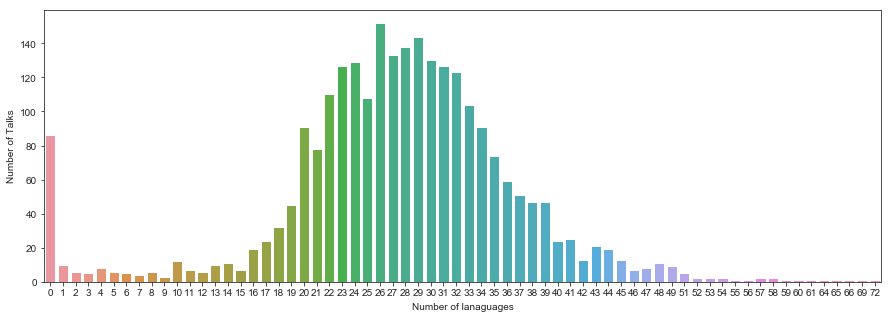

In [25]:
plt.figure(figsize=(15,5))
bar=sns.barplot(x='number_of_lanaguages', y='number_of_talks', data=language_df)
bar.set(xlabel='Number of lanaguages', ylabel='Number of Talks')

##### What kind of occupation do people offten appear giving a TED Talk? 

In [26]:
occupation_df = tedMain.speaker_occupation.value_counts().reset_index()
occupation_df.columns = ['speaker_occupation', 'appearances']

occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df.head(10)

,speaker_occupation,appearances
0,Writer,45
2,Designer,34
1,Artist,34
3,Journalist,33
4,Entrepreneur,31
5,Architect,30
6,Inventor,27
7,Psychologist,26
8,Photographer,25
9,Filmmaker,21


[Text(0,0.5,'Number of Appearances'), Text(0.5,0,'Speaker Occupation')]

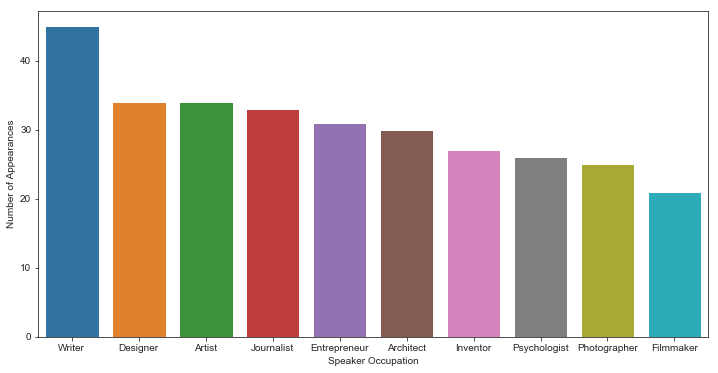

In [27]:
# visualize which occupation is more likely to show up in TED Talk
plt.figure(figsize=(12,6))
bar=sns.barplot(x='speaker_occupation', y='appearances', data=occupation_df.head(10))
bar.set(xlabel='Speaker Occupation', ylabel='Number of Appearances')

(0, 4000000.0)

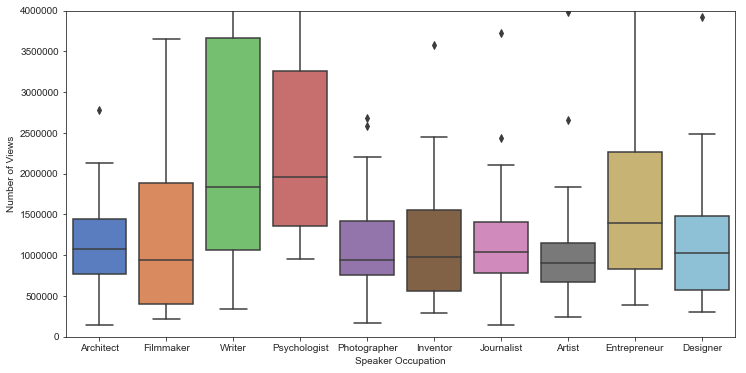

In [28]:
# visualize the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot. 
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
bar=sns.boxplot(x='speaker_occupation', y='views', data=tedMain[tedMain['speaker_occupation'].isin(occupation_df.head(10)['speaker_occupation'])], palette="muted", ax =ax)
bar.set(xlabel='Speaker Occupation', ylabel='Number of Views')
ax.set_ylim([0, 0.4e7])

##### What are the most popular words people would use in their titles?

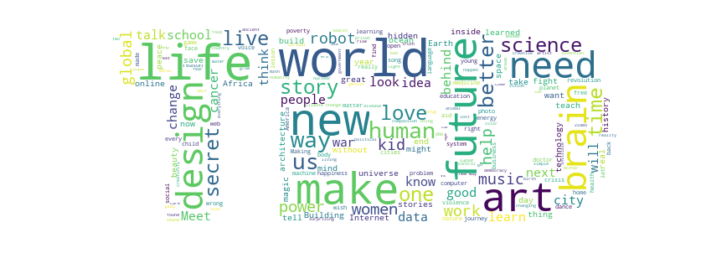

In [29]:
from PIL import Image
mask = np.array(Image.open('imgs/ted_shape.png'))

wordcloud = WordCloud(background_color='white',mask=mask, stopwords=STOPWORDS).generate(' '.join(tedMain['title']))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

##### What are the most popular topics people would like to talk?

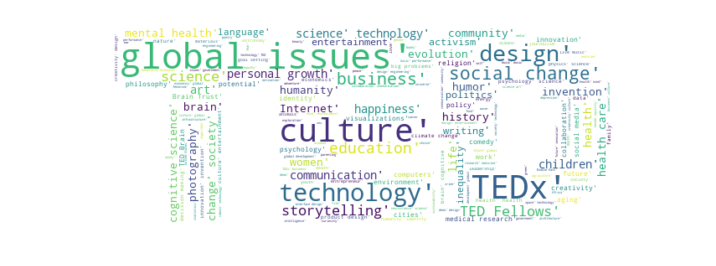

In [30]:
from PIL import Image
mask = np.array(Image.open('imgs/ted_shape.png'))

wordcloud = WordCloud(background_color='white',mask=mask, stopwords=STOPWORDS)
wordcloud.generate(' '.join(tedMain[tedMain.views > tedMain.views.median()]['tags']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Prepare Data
#### Formatting Data 

##### duration
__duration__ is representing the length of the talk in seconds. In order to reduce the number of unique values for this column, it would be better to convert from seconds to minutes and round up to an __integer__ value.

In [31]:
len(tedMain.duration.unique())

1083

In [32]:
# convert from seconds to minutes
def getNumberOfMinutes(second):
    mins = second/60
    return int(round(mins))

tedMain.duration = tedMain.duration.apply(getNumberOfMinutes)

tedMain.duration.head()

0    19
1    16
2    21
3    19
4    20
Name: duration, dtype: int64

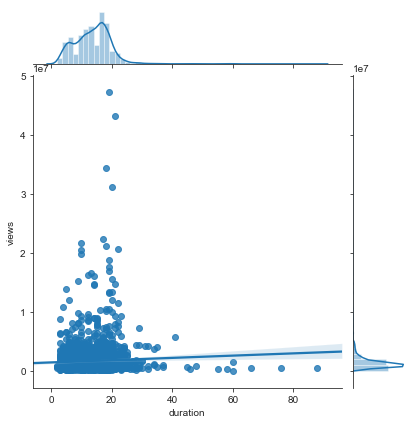

In [33]:
sns.jointplot(x=tedMain['duration'], y=tedMain['views'], kind='reg')

##### Add a new column - 'number_of_attendences'

While analyzing the dataset, it was noticed that there are some speakers have given more than one talks, such as, __Hans Rosling__ has shown up in TED Talk 9 times. Consequently, we can infer that the __experience__ in TED Talk might be an attribute that could affect the number of __views__. 

In [34]:
# Check how many talks the main speaker have shown up and use it as a new attribute
talks_per_speaker_df=tedMain.main_speaker.value_counts().reset_index()
talks_per_speaker_df.columns=['main_speaker','number_of_talks']

talks_per_speaker_df.head()

,main_speaker,number_of_talks
0,Hans Rosling,9
1,Juan Enriquez,7
2,Marco Tempest,6
3,Rives,6
4,Jacqueline Novogratz,5


In [35]:
def getNumberOfTalksPerSpeaker(name):
    return int(talks_per_speaker_df[talks_per_speaker_df['main_speaker'] == name].number_of_talks)

tedMain['number_of_attendences']=tedMain.main_speaker.apply(getNumberOfTalksPerSpeaker)

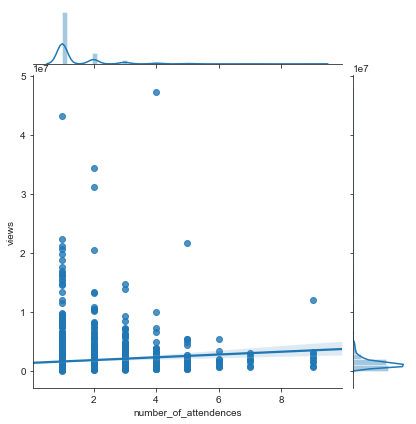

In [36]:
sns.jointplot(x=tedMain['number_of_attendences'], y=tedMain['views'], kind='reg')

##### film_data and published_date
The value for __'film_date'__ and __'published_date'__ are in UNIX Timestamp, which is not human readable without conversion. So, it would be easier to process by converting those values to a __datetime__ format. For example, __"yyyy-MM-dd"__.

In [37]:
def getDate(time):
    date_info = datetime.date.fromtimestamp(time)
    return date_info

tedMain.film_date = tedMain.film_date.apply(getDate)
tedMain.published_date = tedMain.published_date.apply(getDate)

# Verify the conversion is okay
tedMain.loc[0:5,['film_date','published_date']]

,film_date,published_date
0,2006-02-24,2006-06-26
1,2006-02-24,2006-06-26
2,2006-02-23,2006-06-26
3,2006-02-25,2006-06-26
4,2006-02-21,2006-06-27
5,2006-02-01,2006-06-27


In addition, both __film_date__ and __publised_date__ can still be broken down to more detailed values, such as, _which year_, _which month_, _which weekday_? <br/>
In order to do better visualzation, it would be necessary to extract out all those informations and use them as new features.

In [38]:
# extract day, month, year information from Datetime
tedMain['film_year'] = tedMain['film_date'].apply(lambda x: x.year)             # yyyy 
tedMain['film_month'] = tedMain['film_date'].apply(lambda x: x.month)           # 1 --> 12 
tedMain['film_weekday'] = tedMain['film_date'].apply(lambda x: x.weekday())     # 0 --> 6

tedMain['pub_year'] = tedMain['published_date'].apply(lambda x: x.year)         # yyyy
tedMain['pub_month'] = tedMain['published_date'].apply(lambda x: x.month)       # 1 --> 12
tedMain['pub_weekday'] = tedMain['published_date'].apply(lambda x: x.weekday()) # 0 --> 6

In [39]:
# defined functions for retrieving the string value for Month and Weekday
month_array = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_array = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'] 

def getMonthStr(x):
    return month_array[x-1]

def getDayStr(x):
    return day_array[x]

##### Visualize the number of  Published/Filmed Talks per Month

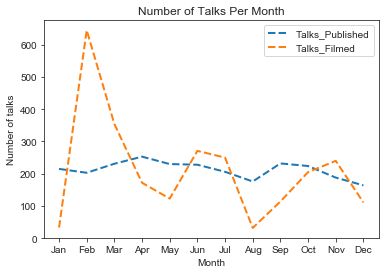

In [40]:
# Visualize the number of talks per Month based on both published_date and film_date
pub_month_df = pd.DataFrame(tedMain.pub_month.value_counts().reset_index())
pub_month_df.columns = ['Month', "Talks_Published"]

flm_month_df = pd.DataFrame(tedMain.film_month.value_counts().reset_index())
flm_month_df.columns = ['Month', "Talks_Filmed"]

month_df = pub_month_df.join(flm_month_df.set_index('Month'), on='Month')
month_df.sort_values('Month',ascending=True, inplace=True)
month_df.Month=month_df.Month.apply(getMonthStr)

plt.plot(month_df.Month, month_df.Talks_Published, '--', linewidth=2)
plt.plot(month_df.Month, month_df.Talks_Filmed, '--', linewidth=2)
plt.title('Number of Talks Per Month')
plt.ylabel('Number of talks')
plt.xlabel('Month')
plt.legend()
plt.show()

(0, 4000000.0)

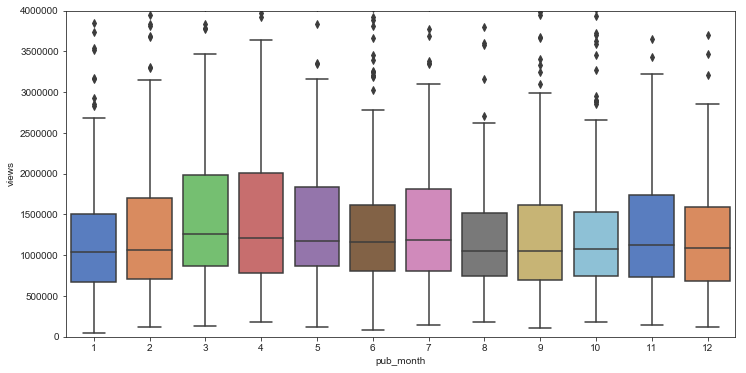

In [41]:
# show the views per pub_month
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='pub_month', y='views', data=tedMain, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

##### Visualize the number of  Published/Filmed Talks per Weekday

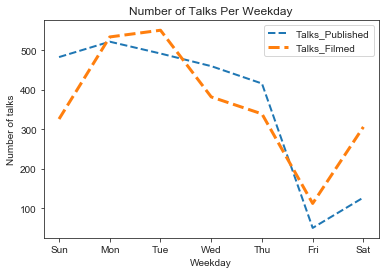

In [42]:
pub_weekday_df = pd.DataFrame(tedMain.pub_weekday.value_counts().reset_index())
pub_weekday_df.columns = ['Weekday', "Talks_Published"]

flm_weekday_df = pd.DataFrame(tedMain.film_weekday.value_counts().reset_index())
flm_weekday_df.columns = ['Weekday', "Talks_Filmed"]

weekday_df = pub_weekday_df.join(flm_weekday_df.set_index('Weekday'), on='Weekday')
weekday_df.sort_values('Weekday',ascending=True, inplace=True)
weekday_df.Weekday=weekday_df.Weekday.apply(getDayStr)

plt.plot(weekday_df.Weekday, weekday_df.Talks_Published, '--', linewidth=2)
plt.plot(weekday_df.Weekday, weekday_df.Talks_Filmed, '--', linewidth=3)
plt.title('Number of Talks Per Weekday')
plt.ylabel('Number of talks')
plt.xlabel('Weekday')
plt.legend()
plt.show()

(0, 4000000.0)

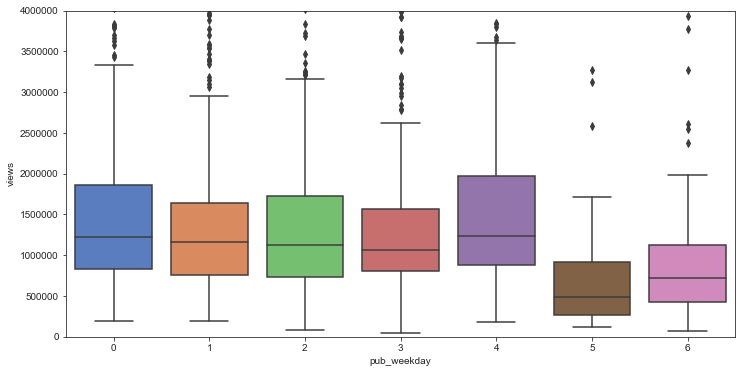

In [43]:
# show the views per pub_weekday
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='pub_weekday', y='views', data=tedMain, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

##### Visualize the number of  Published/Filmed Talks per Year

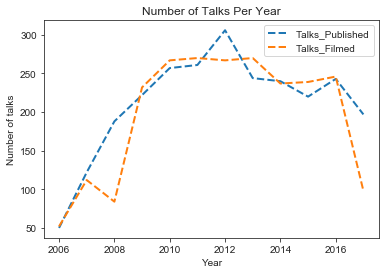

In [44]:
pub_year_df = pd.DataFrame(tedMain.pub_year.value_counts().reset_index())
pub_year_df.columns = ['Year', "Talks_Published"]

flm_year_df = pd.DataFrame(tedMain.film_year.value_counts().reset_index())
flm_year_df.columns = ['Year', "Talks_Filmed"]

year_df = pub_year_df.join(flm_year_df.set_index('Year'), on='Year')
year_df.sort_values('Year',ascending=True, inplace=True)

plt.plot(year_df.Year, year_df.Talks_Published, '--', linewidth=2)
plt.plot(year_df.Year, year_df.Talks_Filmed, '--', linewidth=2)
plt.title('Number of Talks Per Year')
plt.ylabel('Number of talks')
plt.xlabel('Year')
plt.legend()
plt.show()

##### event

In [45]:
tedMain.event.describe()

count        2550
unique        355
top       TED2014
freq           84
Name: event, dtype: object

Based on the current __DataSet__, there are _355_ unique values for Event. However, according to __Wikipedia__, __TED Talk__ has different event types, such as, __TED Conferences__, __TED Global__, __TEDx__, and __TED Women__, etc. Consequently, it is reasonable to convert categorize the __event__ column to different classes. <br/>
- TED Conferences
- TEDGlobal
- TED Translators (formerly The Open Translation Project (OTP))
- TEDx
- TED Fellows
- TED-Ed
- TEDMED
- TEDWomen
- TEDYouth
- Other programs

In [46]:
# Categorize the TED Talk Event Types
def getEventClass(x):
    if (x.count('TED20') > 0) or (x.count('TED19') > 0):
        return "TED_Conference"
    elif x.count('TEDGlobal') > 0:
        return "TED_Global"    
    elif x.count('TEDx') > 0:
        return "TED_X"
    elif x.count('TED-Ed') > 0:
        return "TED_ED"
    elif x.count('TEDMED') > 0:
        return "TED_MED"
    elif x.count('TEDWomen') > 0:
        return "TED_Women"
    elif x.count('TEDYouth') > 0:
        return "TED_Youth"
    else:
        return "TED_Other"

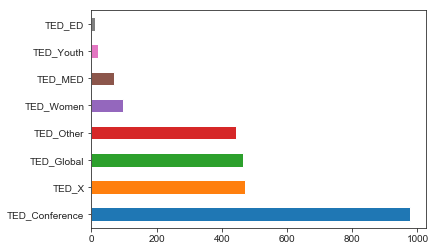

In [47]:
# Add a new column for the event class and drop current 'event' later
tedMain['event_class']='TED_Other'
tedMain['event_class']=tedMain.event.apply(getEventClass)

# Visualize the Event Class distribution
tedMain.event_class.value_counts().plot(kind='barh')

In [48]:
# Convert Categorical Columns to Numeric Values
tedMain['event_class']=tedMain['event_class'].astype("category").cat.codes

##### ratings

In [49]:
tedMain.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

__ratings__ is a stringified dictionary of the various ratings given to the talk, it contains number of ratings on certain category. In order to format this filed and take advantage of it, the first thing need to do is to parse and split this string filed to get number of ratings on particular type. Then, it would be easier to handle if those ratings types can be categorized to two groups, __positive_ratings__ and __negative_ratings__.

In [50]:
# To count value of each rating type
def count_ratings(ratings, rating_type):
    entry = ast.literal_eval(ratings)
    for rating in entry:
        if rating['name'] == rating_type:
            return rating['count']

In [51]:
# a list for all ratings types
rating_types = set([])

for record in tedMain['ratings']:
    lists = ast.literal_eval(record)
    for entry in lists:
        rating_types.add(entry['name'])

for each_type in rating_types:
    tedMain[each_type] = tedMain['ratings'].apply(lambda rating : count_ratings(rating, each_type))

rating_list = list(rating_types)
tedMain['ratings'] = tedMain[rating_list].sum(axis=1)
rating_list.insert(0,'ratings')
tedMain[rating_list].head()

,ratings,Inspiring,Courageous,Informative,Unconvincing,Confusing,Funny,Beautiful,Ingenious,Longwinded,Persuasive,Jaw-dropping,OK,Fascinating,Obnoxious
0,93850,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209
1,2936,413,139,443,258,62,544,58,56,113,268,116,203,132,131
2,2824,230,45,395,104,27,964,60,183,78,230,54,146,166,142
3,3728,1070,760,380,36,32,59,291,105,53,460,230,85,132,35
4,25620,2893,318,5433,67,72,1390,942,3202,110,2542,3736,248,4606,61


In [52]:
#Convert ratings from string to integers so we can use mathematical operations
tedMain['ratings'] = tedMain['ratings'].astype(int)

In [53]:
#Categorize the ratings into the three broad categories
positive = ['Informative', 'Persuasive','Funny','Beautiful','Ingenious','Courageous','Inspiring','Jaw-dropping','Fascinating']
negative = ['OK','Longwinded','Unconvincing','Obnoxious','Confusing']

#Create new columns that sum the ratings appropriately
tedMain['positive_ratings'] = tedMain['Informative'] + tedMain['Persuasive'] + tedMain['Funny'] + tedMain['Beautiful'] + tedMain['Ingenious'] + tedMain['Courageous'] + tedMain['Inspiring'] + tedMain['Jaw-dropping'] + tedMain['Fascinating']
tedMain['negative_ratings'] = tedMain['OK'] + tedMain['Longwinded'] + tedMain['Unconvincing'] + tedMain['Obnoxious'] + tedMain['Confusing']

In [54]:
#lets look at the first 5 talks.
tedMain[['positive_ratings','negative_ratings']].head()

,positive_ratings,negative_ratings
0,91538,2312
1,2169,767
2,2327,497
3,3487,241
4,25062,558


correlation = 0.8655856321907472


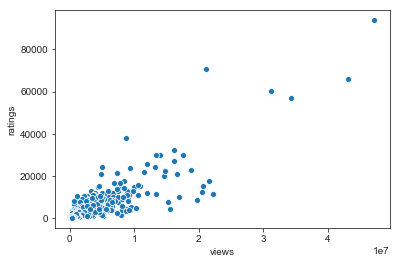

In [55]:
sns.scatterplot(x='views', y='ratings', data=tedMain)

print("correlation = "+str(tedMain['views'].corr(tedMain['ratings'])))

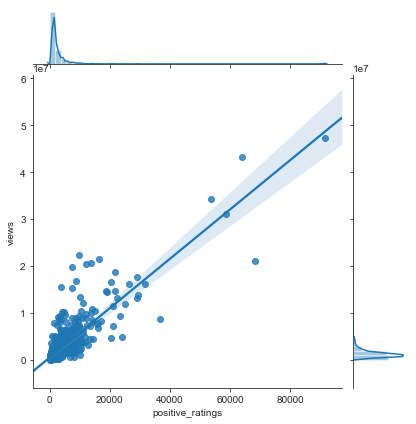

In [56]:
sns.jointplot(x=tedMain['positive_ratings'], y=tedMain['views'], kind='reg')

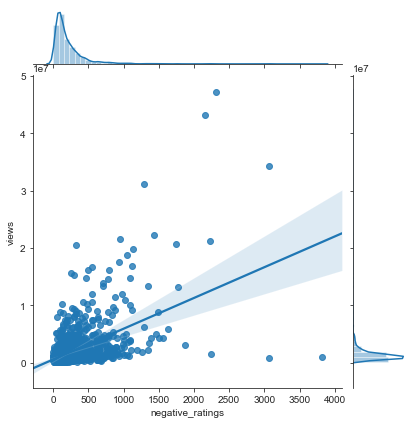

In [57]:
sns.jointplot(x=tedMain['negative_ratings'], y=tedMain['views'], kind='reg')

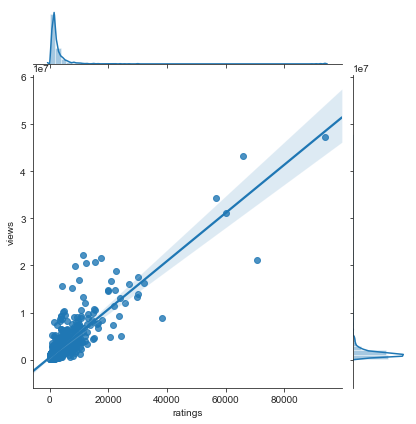

In [58]:
sns.jointplot(x=tedMain['ratings'], y=tedMain['views'], kind='reg')

##### tags <br/>
After analyzing the __tags__ column, it was noticed that this column has various values on both the __RAW__ value and __Number of tags__. For the first model that being built would use only numeric values, so, a new column __number_tags__ would be added for model builing.

In [59]:
# before formating
tedMain.tags[0]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

In [60]:
# Convert a string to a list
tedMain['tags'] = tedMain['tags'].apply(lambda x: ast.literal_eval(x))

In [61]:
# after formatting
tedMain.tags[0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

In [62]:
tedMain['number_of_tags']=tedMain.tags.apply(lambda x: len(x))

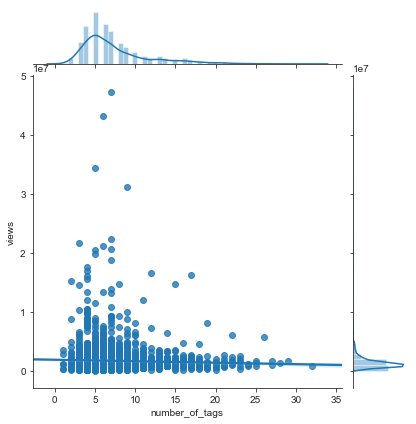

In [63]:
sns.jointplot(x=tedMain['number_of_tags'], y=tedMain['views'], kind='reg')

In [64]:
# Seperate the tag list to different items and join with the tedMain Dataframe to do visualization on the topics
tags_series = tedMain.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
tags_series.name = 'topic'

theme_df = tedMain.drop('tags', axis=1).join(tags_series)
theme_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,number_of_attendences,film_year,film_month,film_weekday,pub_year,pub_month,pub_weekday,event_class,Inspiring,Courageous,Informative,Unconvincing,Confusing,Funny,Beautiful,Ingenious,Longwinded,Persuasive,Jaw-dropping,OK,Fascinating,Obnoxious,positive_ratings,negative_ratings,number_of_tags,topic
0,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,education


In [65]:
popular_topics_df = pd.DataFrame(theme_df['topic'].value_counts()).reset_index()
popular_topics_df.columns = ['topic', 'number_of_talks']
popular_topics_df.head(10)

,topic,number_of_talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


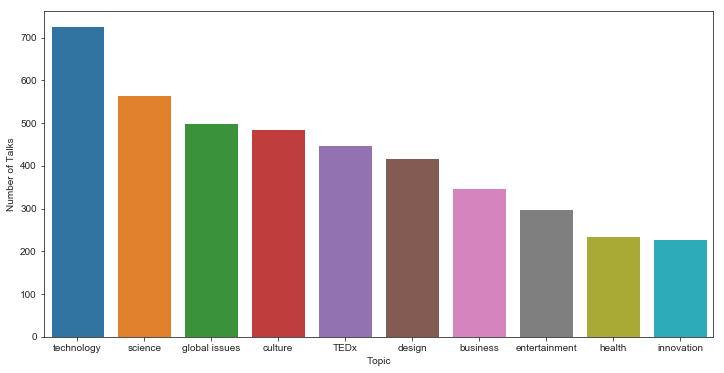

In [66]:
plt.figure(figsize=(12,6))
bar=sns.barplot(x='topic', y='number_of_talks', data=popular_topics_df.head(10))
bar.set(xlabel='Topic', ylabel='Number of Talks')
plt.show()

(0, 4000000.0)

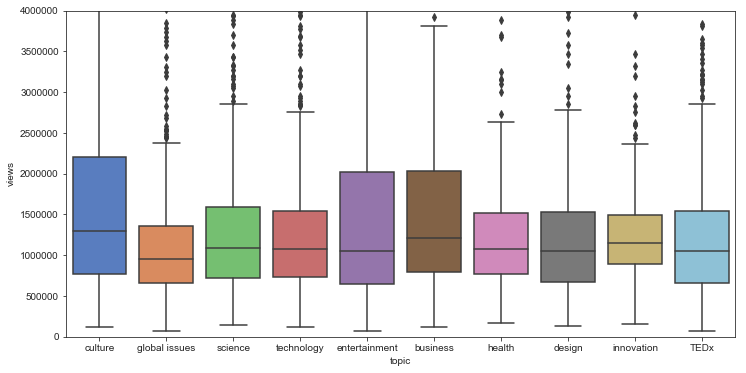

In [67]:
pop_theme_talks = theme_df[theme_df['topic'].isin(popular_topics_df.head(10)['topic'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='topic', y='views', data=pop_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

##### views

In [68]:
tedMain.views.describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [69]:
# get the median value for number of views to determine the talk is popular or not
view_median = tedMain.views.median()

# function to check if talk is popular or not
def isTalkPopular(views):
    if float(views) > view_median:
        return True
    else:
        return False

In [70]:
# Introduce a new column to represent the popularity
tedMain['popular']=tedMain.views.apply(isTalkPopular)

[Text(0,0.5,'Number of Talks'), Text(0.5,0,'Popular')]

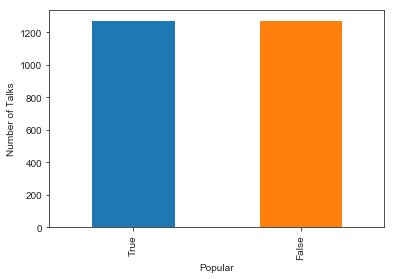

In [71]:
# Visualize the Popular/Un-popular distribution
bar=tedMain.popular.value_counts().plot(kind='bar')
bar.set(xlabel='Popular', ylabel='Number of Talks')

In [72]:
tedMain.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,number_of_attendences,film_year,film_month,film_weekday,pub_year,pub_month,pub_weekday,event_class,Inspiring,Courageous,Informative,Unconvincing,Confusing,Funny,Beautiful,Ingenious,Longwinded,Persuasive,Jaw-dropping,OK,Fascinating,Obnoxious,positive_ratings,negative_ratings,number_of_tags,popular
0,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,True
1,265,With the same humor and humanity he exuded in ...,16,TED2006,2006-02-24,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-26,2936,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,4,2006,2,4,2006,6,0,0,413,139,443,258,62,544,58,56,113,268,116,203,132,131,2169,767,9,True
2,124,New York Times columnist David Pogue takes aim...,21,TED2006,2006-02-23,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-26,2824,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,4,2006,2,3,2006,6,0,0,230,45,395,104,27,964,60,183,78,230,54,146,166,142,2327,497,9,True
3,200,"In an emotionally charged talk, MacArthur-winn...",19,TED2006,2006-02-25,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-26,3728,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2,2006,2,5,2006,6,0,0,1070,760,380,36,32,59,291,105,53,460,230,85,132,35,3487,241,9,True
4,593,You've never seen data presented like this. Wi...,20,TED2006,2006-02-21,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,25620,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,9,2006,2,1,2006,6,1,0,2893,318,5433,67,72,1390,942,3202,110,2542,3736,248,4606,61,25062,558,11,True


### Visualize the correlation between number of views and other attributes, such as, duration, lanaguages, and comments.

,comments,duration,languages,num_speaker,ratings,positive_ratings,negative_ratings,number_of_attendences,number_of_tags,film_weekday,film_month,film_year,pub_weekday,pub_month,pub_year,views
comments,1.000000,0.139420,0.318284,-0.035489,0.644329,0.632114,0.546107,0.100333,-0.110117,-0.052342,-0.058699,-0.131046,-0.045827,-0.024677,-0.182624,0.530939
duration,0.139420,1.000000,-0.295632,0.022073,0.096642,0.096360,0.056545,0.027392,0.052585,0.006003,0.007575,-0.247350,-0.079950,-0.032307,-0.163094,0.047745
languages,0.318284,-0.295632,1.000000,-0.063100,0.338101,0.330415,0.307456,0.161638,-0.165973,-0.149661,-0.085882,-0.056076,-0.082789,0.020730,-0.172873,0.377623
num_speaker,-0.035489,0.022073,-0.063100,1.000000,-0.039488,-0.038195,-0.042375,-0.048927,0.039960,-0.006645,-0.026483,0.042794,0.020500,0.014358,0.047840,-0.026389
ratings,0.644329,0.096642,0.338101,-0.039488,1.000000,0.998714,0.558376,0.124440,-0.050798,-0.025255,-0.059216,-0.089005,-0.022668,-0.017790,-0.125493,0.865586
positive_ratings,0.632114,0.096360,0.330415,-0.038195,0.998714,1.000000,0.515603,0.122263,-0.043958,-0.024110,-0.056405,-0.078691,-0.022246,-0.018343,-0.113462,0.861209
negative_ratings,0.546107,0.056545,0.307456,-0.042375,0.558376,0.515603,1.000000,0.102490,-0.139236,-0.032310,-0.077816,-0.216610,-0.019077,-0.000509,-0.264315,0.536740
number_of_attendences,0.100333,0.027392,0.161638,-0.048927,0.124440,0.122263,0.102490,1.000000,-0.009912,0.012282,-0.089943,-0.184552,-0.056005,0.000900,-0.210076,0.095676
number_of_tags,-0.110117,0.052585,-0.165973,0.039960,-0.050798,-0.043958,-0.139236,-0.009912,1.000000,0.076669,0.047980,0.263203,-0.062850,-0.043564,0.320571,-0.043151
film_weekday,-0.052342,0.006003,-0.149661,-0.006645,-0.025255,-0.024110,-0.032310,0.012282,0.076669,1.000000,-0.088793,-0.083072,0.020979,-0.012016,-0.015878,-0.045508


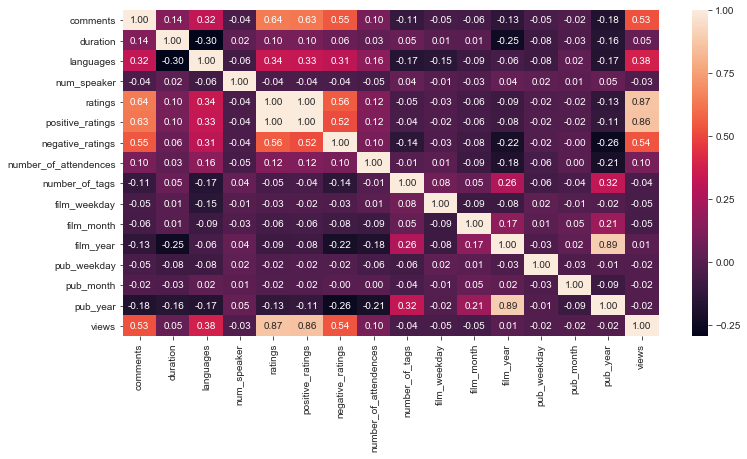

In [73]:
heat_df=tedMain[['comments', 'duration', 'languages', 'num_speaker','ratings','positive_ratings', 
                 'negative_ratings', 'number_of_attendences','number_of_tags', 'film_weekday', 'film_month', 
                 'film_year','pub_weekday', 'pub_month','pub_year','views']].copy()
plt.figure(figsize=(12,6))
sns.heatmap(heat_df.corr(), annot=True, fmt=".2f")

# print the correlation in a table
heat_df.corr()

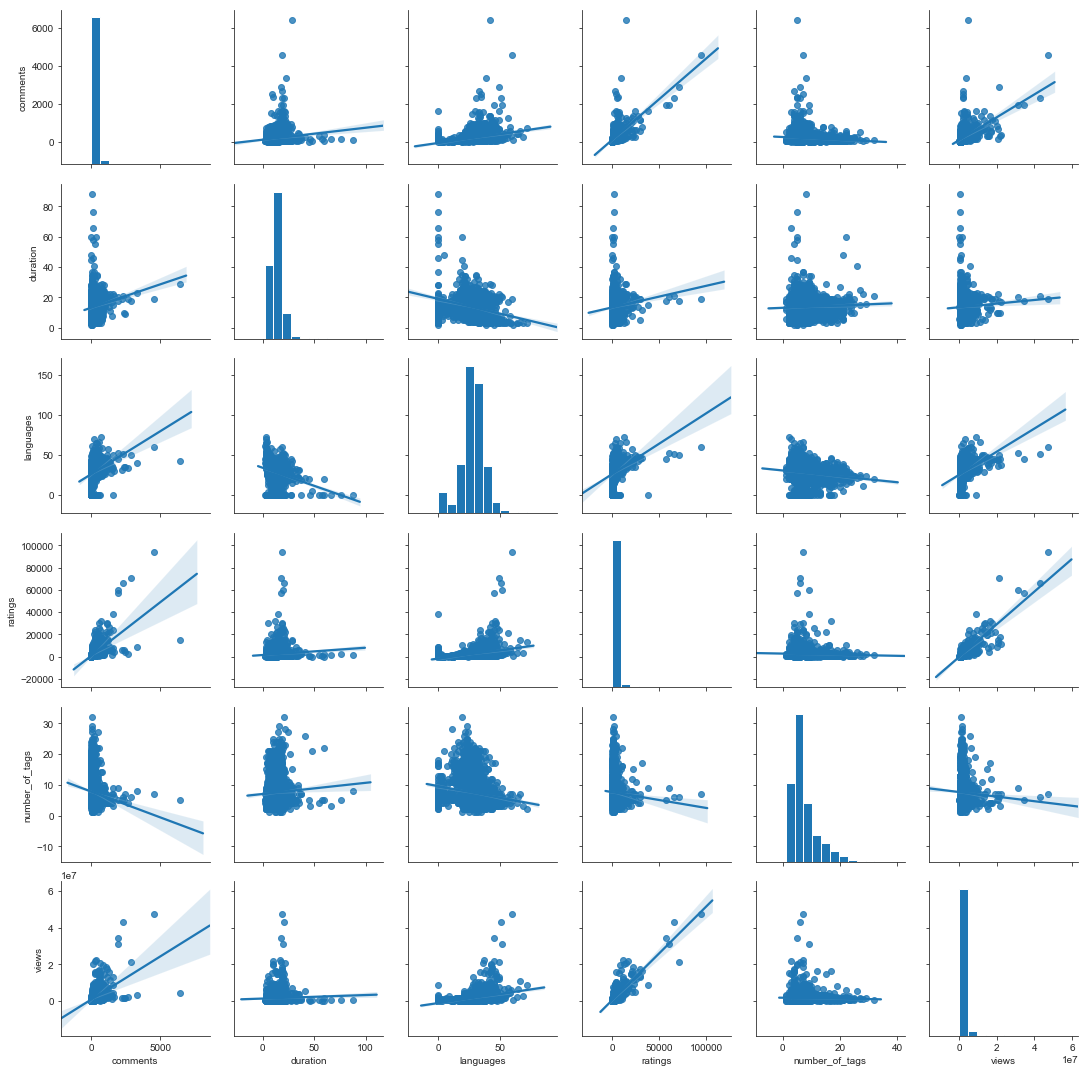

In [74]:
nums = ['comments', 'duration', 'languages', 'ratings', 'number_of_tags','views']
# linear regression 
sns.pairplot(tedMain, vars=nums, kind='reg');

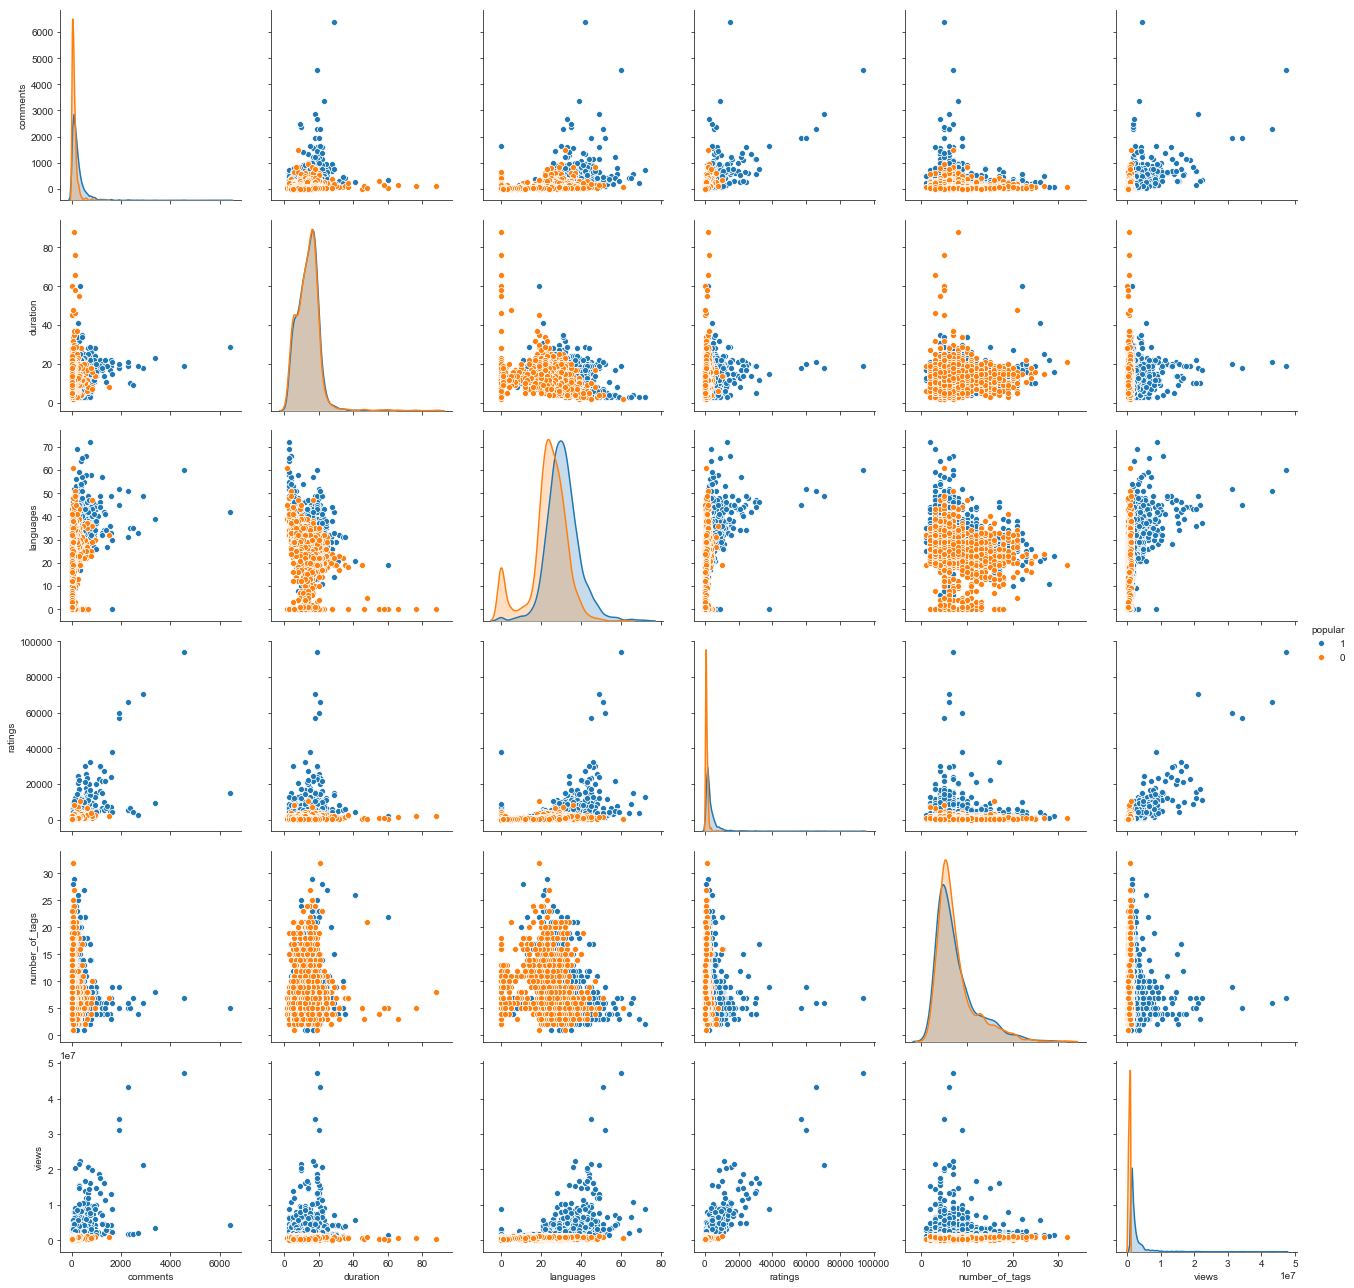

In [75]:
nums = ['comments', 'duration', 'languages', 'ratings', 'number_of_tags','views']
#  kernel density estimates
sns.pairplot(tedMain, vars=nums, hue='popular', hue_order = [1,0], diag_kind='kde', size=3);

## Model Data

In [76]:
COLUMNS_NOT_USED_FOR_MODEL = ['description','film_date','main_speaker','name','published_date',
                              'related_talks','speaker_occupation','positive_ratings', 'negative_ratings',
                              'tags','title','url','popular','event','pub_year','film_year']

In [77]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def getModelEvaluation(clf, X_train, y_train, X_test, y_test):
    predictions=clf.predict(X_test)
    print ("Train Accuracy : ", accuracy_score(y_train, clf.predict(X_train)) * 100) 
    print ("Prediction Accuracy : ", accuracy_score(y_test, predictions) * 100) 
    print ("Confusion Matrix : \n", confusion_matrix(y_test, predictions)) 
    print ("Classification Report: \n", classification_report(y_test,predictions))

In [78]:
# visualize the feature importance for a randomforest model
def showFeatureImportance(featureNames, clf, label_x, label_y):
    # get number of features
    n_features = len(featureNames)
    plt.figure(figsize=(10,6))
    plt.barh(range(n_features), clf.feature_importances_*100, align='center')
    plt.yticks(np.arange(n_features), featureNames)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
    pass

##### Remove columns not used for building model

In [79]:
# remove columns not being used
tedCleaned=tedMain.drop(COLUMNS_NOT_USED_FOR_MODEL, axis=1)

# remove positive ratings
tedCleaned.drop(positive, axis=1, inplace=True)

# remove negative ratings
tedCleaned.drop(negative, axis=1, inplace=True)

In [80]:
tedCleaned.head()

,comments,duration,languages,num_speaker,ratings,views,number_of_attendences,film_month,film_weekday,pub_month,pub_weekday,event_class,number_of_tags
0,4553,19,60,1,93850,47227110,4,2,4,6,0,0,7
1,265,16,43,1,2936,3200520,4,2,4,6,0,0,9
2,124,21,26,1,2824,1636292,4,2,3,6,0,0,9
3,200,19,35,1,3728,1697550,2,2,5,6,0,0,9
4,593,20,48,1,25620,12005869,9,2,1,6,1,0,11


##### Linear Regression Analysis 

In [81]:
# Fits a linear model using different features and views
# Prints the summary page to show coefficients, p-values, and R squared
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def getSummaryForViews(df):
    lr = LinearRegression()
    lr.fit(df[df.columns], df['views'])

    X = df[df.columns]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['views'], X2)
    est2 = est.fit()
    print(est2.summary())
    pass

getSummaryForViews(tedCleaned)

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.571e+32
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:16:43   Log-Likelihood:                 47662.
No. Observations:                2550   AIC:                        -9.530e+04
Df Residuals:                    2536   BIC:                        -9.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.586e-

##### Split dataset into train and test datasets

In [82]:
# Spilt dataset to training and test
X=tedCleaned.drop(['views'], axis=1)
y=tedMain.popular
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# show the spilt result
print ("X_train Shape -> ", X_train.shape)
print ("y_train Shape -> ", y_train.shape)
print ("X_test Shape  -> ", X_test.shape)
print ("y_test Shape  -> ", y_test.shape)

X_train Shape ->  (2040, 12)
y_train Shape ->  (2040,)
X_test Shape  ->  (510, 12)
y_test Shape  ->  (510,)


##### Classification model - LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
getModelEvaluation(logreg, X_train, y_train, X_test, y_test)

Train Accuracy :  78.18627450980392
Prediction Accuracy :  77.64705882352942
Confusion Matrix : 
 [[222  57]
 [ 57 174]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.80      0.80      0.80       279
       True       0.75      0.75      0.75       231

avg / total       0.78      0.78      0.78       510



##### Classification model - DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
getModelEvaluation(clf, X_train, y_train, X_test, y_test)

Train Accuracy :  100.0
Prediction Accuracy :  72.54901960784314
Confusion Matrix : 
 [[200  79]
 [ 61 170]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.77      0.72      0.74       279
       True       0.68      0.74      0.71       231

avg / total       0.73      0.73      0.73       510



##### Classification model - RandomForestClassifier

In [87]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
# Check the performance of the model
getModelEvaluation(clf, X_train, y_train, X_test, y_test)

Train Accuracy :  99.16666666666667
Prediction Accuracy :  79.2156862745098
Confusion Matrix : 
 [[227  52]
 [ 54 177]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.81      0.81      0.81       279
       True       0.77      0.77      0.77       231

avg / total       0.79      0.79      0.79       510



##### Statistical Summary for selected features

In [89]:
X.describe()

,comments,duration,languages,num_speaker,ratings,number_of_attendences,film_month,film_weekday,pub_month,pub_weekday,event_class,number_of_tags
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,191.562353,13.777255,27.326275,1.028235,2436.408235,1.461961,5.634510,2.562353,6.297255,2.181176,2.492941,7.511373
std,282.315223,6.249848,9.563452,0.207705,4226.795631,1.013795,3.400861,1.844652,3.367435,1.654351,2.345365,4.309849
min,2.000000,2.000000,0.000000,1.000000,68.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,63.000000,10.000000,23.000000,1.000000,870.750000,1.000000,2.000000,1.000000,3.000000,1.000000,0.000000,5.000000
50%,118.000000,14.000000,28.000000,1.000000,1452.500000,1.000000,5.000000,2.000000,6.000000,2.000000,2.000000,6.000000
75%,221.750000,17.000000,33.000000,1.000000,2506.750000,2.000000,9.000000,4.000000,9.000000,3.000000,4.000000,9.000000
max,6404.000000,88.000000,72.000000,5.000000,93850.000000,9.000000,12.000000,6.000000,12.000000,6.000000,7.000000,32.000000


##### Improved Classification model - RandomForest + StandardScaler

Those numerical values do not have the same scale, it would be better to apply scaling to both training and test datasets.

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=60, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [91]:
# Check the performance of the model
getModelEvaluation(clf, X_train, y_train, X_test, y_test)

Train Accuracy :  100.0
Prediction Accuracy :  79.01960784313725
Confusion Matrix : 
 [[221  58]
 [ 49 182]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.82      0.79      0.81       279
       True       0.76      0.79      0.77       231

avg / total       0.79      0.79      0.79       510



##### Show the feature importance with RandomForest

In [92]:
list(zip(X.columns, clf.feature_importances_))

[('comments', 0.15340022186683636),
 ('duration', 0.061629866859108526),
 ('languages', 0.12511433216821993),
 ('num_speaker', 0.00272065717568445),
 ('ratings', 0.3629979880446868),
 ('number_of_attendences', 0.019454093025503272),
 ('film_month', 0.04591158983978026),
 ('film_weekday', 0.0415254886540891),
 ('pub_month', 0.04494912540847047),
 ('pub_weekday', 0.04760506052906),
 ('event_class', 0.028768189977921108),
 ('number_of_tags', 0.06592338645063973)]

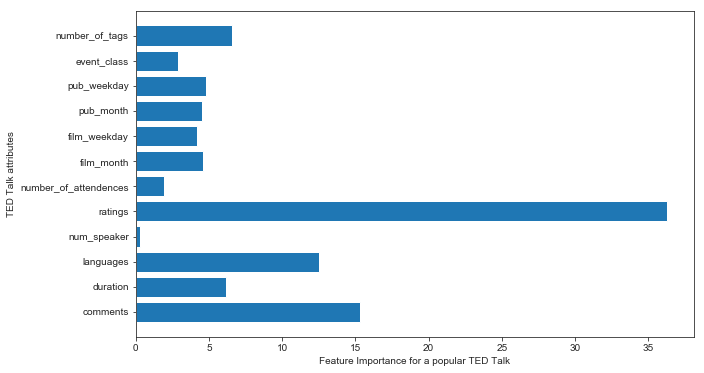

In [93]:
showFeatureImportance( X.columns, clf, 'Feature Importance for a popular TED Talk','TED Talk attributes')

##### Improved Classification model - LogisticRegression+Recursive Feature Elimination

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 5)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_) 

Num Features: 5
Selected Features: [ True False  True False  True False False False False  True False  True]
Feature Ranking: [1 7 1 6 1 4 3 5 8 1 2 1]


In [95]:
getModelEvaluation(fit, X_train, y_train, X_test, y_test)

Train Accuracy :  78.08823529411765
Prediction Accuracy :  76.86274509803923
Confusion Matrix : 
 [[222  57]
 [ 61 170]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.78      0.80      0.79       279
       True       0.75      0.74      0.74       231

avg / total       0.77      0.77      0.77       510



##### Print the TOP 5 selected features with RFE

In [96]:
selectedFeatures_df = pd.DataFrame(X.columns,fit.support_).reset_index()
selectedFeatures_df.columns = ['is_selected','feature_name']

In [97]:
print(selectedFeatures_df[selectedFeatures_df.is_selected==True].feature_name)

0           comments
2          languages
4            ratings
9        pub_weekday
11    number_of_tags
Name: feature_name, dtype: object


## Prepare Data (Part II)
Since there is another column __transcript__ that haven't been used yet, which represents the Offcial English Transcript. Applying Natural Language Processing on this column would be interesting, if possible, we can use this to build a predictor that could determine will a Talk be popular or not fully based on the transcript. <br/>

##### transcripts
Joining TED Main and Transcripts -- Since both __tedMain__ and __transcript__ have column __"url"__, I would like to combine those two dataframe into one to share valueable features. For example, group __views__ and __transcript__ to see if we can use apply Natural Language Processing(NLP) on __transcript__ to predict the __views__.

In [98]:
rawTranscripts.shape

(2467, 2)

In [99]:
merged_df = rawTranscripts.merge(tedMain, on='url')

In [100]:
merged_df.head()

,transcript,url,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,number_of_attendences,film_year,film_month,film_weekday,pub_year,pub_month,pub_weekday,event_class,Inspiring,Courageous,Informative,Unconvincing,Confusing,Funny,Beautiful,Ingenious,Longwinded,Persuasive,Jaw-dropping,OK,Fascinating,Obnoxious,positive_ratings,negative_ratings,number_of_tags,popular
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,4553,Sir Ken Robinson makes an entertaining and pro...,19,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,93850,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,47227110,4,2006,2,4,2006,6,0,0,24924,3253,7346,300,242,19645,4573,6073,387,10704,4439,1174,10581,209,91538,2312,7,True
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,265,With the same humor and humanity he exuded in ...,16,TED2006,2006-02-24,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-26,2936,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,3200520,4,2006,2,4,2006,6,0,0,413,139,443,258,62,544,58,56,113,268,116,203,132,131,2169,767,9,True
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,124,New York Times columnist David Pogue takes aim...,21,TED2006,2006-02-23,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-26,2824,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,1636292,4,2006,2,3,2006,6,0,0,230,45,395,104,27,964,60,183,78,230,54,146,166,142,2327,497,9,True
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,200,"In an emotionally charged talk, MacArthur-winn...",19,TED2006,2006-02-25,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-26,3728,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,1697550,2,2006,2,5,2006,6,0,0,1070,760,380,36,32,59,291,105,53,460,230,85,132,35,3487,241,9,True
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,593,You've never seen data presented like this. Wi...,20,TED2006,2006-02-21,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,25620,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,12005869,9,2006,2,1,2006,6,1,0,2893,318,5433,67,72,1390,942,3202,110,2542,3736,248,4606,61,25062,558,11,True


In [101]:
# check to see is there any missing value ?
merged_df.shape

(2467, 44)

##### Understanding the transcript data

In [102]:
merged_df.transcript[0]

'Good morning. How are you?(Laughter)It\'s been great, hasn\'t it? I\'ve been blown away by the whole thing. In fact, I\'m leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we\'ve had and in all of the people here. Just the variety of it and the range of it. The second is that it\'s put us in a place where we have no idea what\'s going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don\'t you? I find this very interesting. If you\'re at a dinner party, and you say you work in education — Actually, you\'re not often at dinner parties, frankly.(Laughter)If you work in education, you\'re not asked.(Laughter)And you\'re never asked back, curiously. That\'s strange to me. But if you are, and you say to somebody, you

In [103]:
len(merged_df.transcript[0])

17409

##### Perform basic Text cleanup on transcript

In [104]:
# import
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [105]:
# function to clean up the transcript 
def textCleanup(document):
    stemmer = SnowballStemmer("english")
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(document))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to lowercase to reduce duplicates
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    
    # Lemmatization
    document = [stemmer.stem(word) for word in document]
    document = ' '.join(document)
    
    # remove those background words
    document=document.replace('(laughter)', ' ')
    document=document.replace('(applause)', ' ')
    
    return document

In [106]:
# define predictors and the binary result
cleaned_transcript = merged_df.transcript.apply(textCleanup)

In [107]:
len(cleaned_transcript[0])

15118

##### Download latest stopwords

In [108]:
# get latest stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Converting Text to Numbers
Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

In [109]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
cleaned_transcript = vectorizer.fit_transform(cleaned_transcript).toarray()

##### Spilt data to training and test data

In [110]:
# get the predictors and the outcome
X=cleaned_transcript
y=merged_df.popular

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

# show the spilt result
print ("X_train Shape -> ", X_train.shape)
print ("y_train Shape -> ", y_train.shape)
print ("X_test Shape  -> ", X_test.shape)
print ("y_test Shape  -> ", y_test.shape)

X_train Shape ->  (1973, 37310)
y_train Shape ->  (1973,)
X_test Shape  ->  (494, 37310)
y_test Shape  ->  (494,)


## Model Data (Part II)

In [112]:
def showROCCurveScore(fpr, tpr, modelName, auc):
    plt.figure()
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' %(modelName,auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC curve for TED Talk transcript classifier')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

##### Classification model - LogisticRegression

In [113]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
getModelEvaluation(logreg, X_train, y_train, X_test, y_test)

Train Accuracy :  99.89863152559553
Prediction Accuracy :  60.526315789473685
Confusion Matrix : 
 [[146 113]
 [ 82 153]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.64      0.56      0.60       259
       True       0.58      0.65      0.61       235

avg / total       0.61      0.61      0.60       494



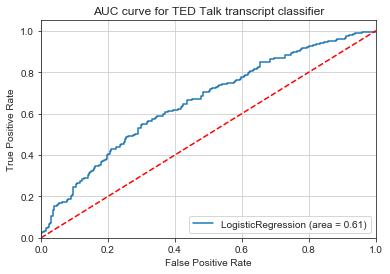

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

showROCCurveScore(fpr, tpr, "LogisticRegression", logit_roc_auc)

##### Classification model - MultinomialNB

In [116]:
# import
from sklearn.naive_bayes import MultinomialNB

# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# train the model 
%time nb.fit(X_train, y_train)

Wall time: 469 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [117]:
getModelEvaluation(nb, X_train, y_train, X_test, y_test)

Train Accuracy :  90.82615306639636
Prediction Accuracy :  67.81376518218623
Confusion Matrix : 
 [[170  89]
 [ 70 165]]
Classification Report: 
              precision    recall  f1-score   support

      False       0.71      0.66      0.68       259
       True       0.65      0.70      0.67       235

avg / total       0.68      0.68      0.68       494



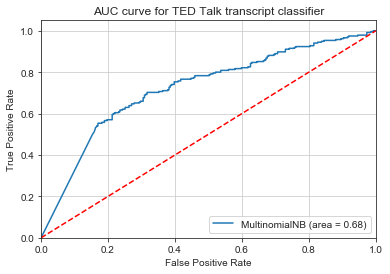

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

nb_auc = roc_auc_score(y_test, nb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

showROCCurveScore(fpr, tpr, "MultinomialNB", nb_auc)

##### Model Performance Comparison with  Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score  

###### LogisticRegression

In [120]:
logreg = LogisticRegression()

print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.6051832586368178


###### MultinomialNB

In [121]:
nb = MultinomialNB()

print(cross_val_score(nb, X, y, cv=10, scoring='accuracy').mean())

0.6502081893288568


## Results

In [122]:
from IPython.display import Image

### Q1: What makes a TED Talk popular?

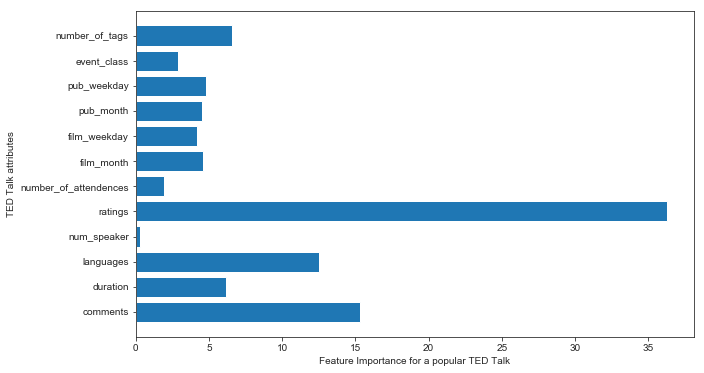

In [123]:
display(Image("imgs/Q1_WhatMakesAPopularTalk.png", width=600))

Above feature importance plot is generated with the RandomForest Classifier while building the classifier for predicting the popularity of a TED talk based on the attributes from the __ted_main__ Dataset. 

The five most relevant features for predicting if a TED Talk would be popular or not are the following:

- **ratings** 
- **comments** 
- **lanaguages** 
- **number_of_tags**
- **pub_weekday** -- __DO PUBLISH/FILM A TED TALK ON FRIDAY NIGHT!__

### Q2: What are the most popular topics??

This is a wordclound being generated based on the __tags__ column from talks that are popular.

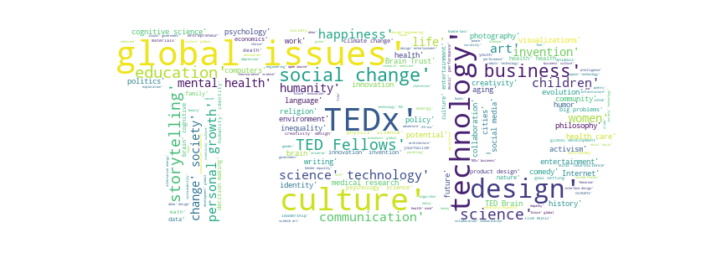

In [124]:
display(Image("imgs/Q2_PopularTopics.png", width=600))

This is a __bar__ plot that based on the occurances of particular __tag__.

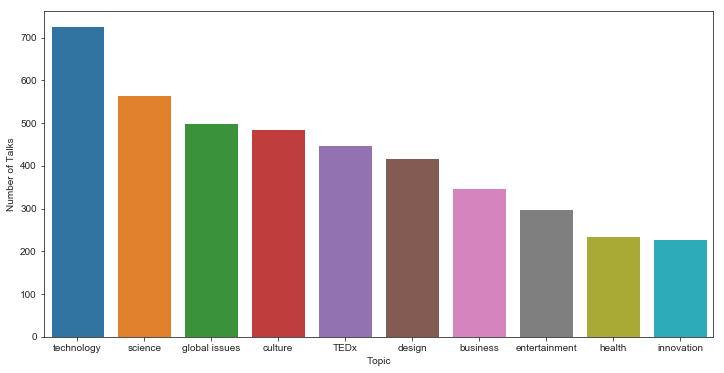

In [125]:
display(Image("imgs/Q2_PopularTopics_2.png", width=600))

### Q3: Will a Talk become popular among TED talks based on given transcript?

In this project, I started to apply Natural Language Processing method to the __transcript__ column by converting each __transcript__ document to a table of words with its according occurances. Then, apply classification alogrithms on this dataset to predict the popularity(based on __views__) that comes from __ted_main__ dataset. <br/>

After the classification model is trained, it was tested against Test Dataset that comes from the orginal Dataset, the classifier could perform prediction, but the accurancy is lower than expected, __less than 70%__. 

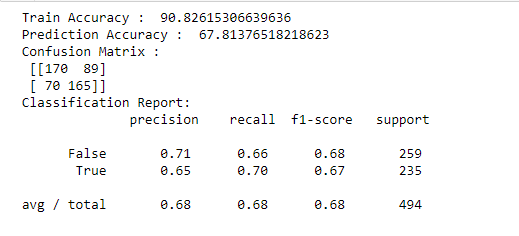

In [126]:
display(Image("imgs/Q3_TranscriptPrediction.png", width=600))

## Lessons Learned

## Deployment